In [111]:
%matplotlib inline
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
plt.style.use('ggplot')

In [50]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
# coloca os titulos de string para serem em minusculos
data.columns.str.lower()
data.count()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

In [51]:
# substitue os campos nulos por 0
data.fillna(0)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [52]:
# quantidade de linhas e colunas
data.shape

(7043, 21)

In [53]:
# mostra o tipo das colunas
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [54]:
# Descrição do Index
data.index

RangeIndex(start=0, stop=7043, step=1)

In [55]:
# print o titulos das colunas
data.columns

Index([u'customerID', u'gender', u'SeniorCitizen', u'Partner', u'Dependents',
       u'tenure', u'PhoneService', u'MultipleLines', u'InternetService',
       u'OnlineSecurity', u'OnlineBackup', u'DeviceProtection', u'TechSupport',
       u'StreamingTV', u'StreamingMovies', u'Contract', u'PaperlessBilling',
       u'PaymentMethod', u'MonthlyCharges', u'TotalCharges', u'Churn'],
      dtype='object')

In [56]:
# faz a contagem de dados não-nulos
data.count()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

In [57]:
# substitui o valor da coluna por 0 e 1
data["Partner"] = data.Partner.replace(to_replace=['No', 'Yes'], value=['0','1'])
data["gender"] = data.Partner.replace(to_replace=['Female', 'Male'], value=['0','1'])
data["Dependents"] = data.Partner.replace(to_replace=['No', 'Yes'], value=['0','1'])
data["PhoneService"] = data.Partner.replace(to_replace=['No', 'Yes'], value=['0','1'])
data["OnlineSecurity"] = data.Partner.replace(to_replace=['No', 'Yes'], value=['0','1'])
data["DeviceProtection"] = data.Partner.replace(to_replace=['No', 'Yes'], value=['0','1'])
data["TechSupport"] = data.Partner.replace(to_replace=['No', 'Yes'], value=['0','1'])
data["StreamingTV"] = data.Partner.replace(to_replace=['No', 'Yes'], value=['0','1'])
data["StreamingMovies"] = data.Partner.replace(to_replace=['No', 'Yes'], value=['0','1'])
data["PaperlessBilling"] = data.Partner.replace(to_replace=['No', 'Yes'], value=['0','1'])
data["OnlineBackup"] = data.Partner.replace(to_replace=['No', 'Yes'], value=['0','1'])
data["Churn"] = data.Partner.replace(to_replace=['No', 'Yes'], value=['0','1'])

In [58]:
# Mostra todas as colunas e dez linhas
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,1,1,1,No phone service,DSL,1,...,1,1,1,1,Month-to-month,1,Electronic check,29.85,29.85,1
1,5575-GNVDE,0,0,0,0,34,0,No,DSL,0,...,0,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,0,0,0,0,2,0,No,DSL,0,...,0,0,0,0,Month-to-month,0,Mailed check,53.85,108.15,0
3,7795-CFOCW,0,0,0,0,45,0,No phone service,DSL,0,...,0,0,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,0,No,Fiber optic,0,...,0,0,0,0,Month-to-month,0,Electronic check,70.70,151.65,0
5,9305-CDSKC,0,0,0,0,8,0,Yes,Fiber optic,0,...,0,0,0,0,Month-to-month,0,Electronic check,99.65,820.5,0
6,1452-KIOVK,0,0,0,0,22,0,Yes,Fiber optic,0,...,0,0,0,0,Month-to-month,0,Credit card (automatic),89.10,1949.4,0
7,6713-OKOMC,0,0,0,0,10,0,No phone service,DSL,0,...,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.9,0
8,7892-POOKP,1,0,1,1,28,1,Yes,Fiber optic,1,...,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1
9,6388-TABGU,0,0,0,0,62,0,No,DSL,0,...,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0


In [59]:
# show one column
data['OnlineBackup'].head(10)

0    1
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    1
9    0
Name: OnlineBackup, dtype: object

In [60]:
# like group by
data.groupby(['MultipleLines']).mean()

,SeniorCitizen,tenure,MonthlyCharges
MultipleLines,,,
No,0.110029,24.134808,54.195059
No phone service,0.152493,31.737537,42.028592
Yes,0.223830,41.914507,82.036974


In [61]:
data["MultipleLines"] = data.MultipleLines.replace(to_replace=["No","Yes","No phone service"],value=["0","1","2"])

In [62]:
data["MultipleLines"].head(10)

0    2
1    0
2    0
3    2
4    0
5    1
6    1
7    2
8    1
9    0
Name: MultipleLines, dtype: object

In [63]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,1,1,1,2,DSL,1,...,1,1,1,1,Month-to-month,1,Electronic check,29.85,29.85,1
1,5575-GNVDE,0,0,0,0,34,0,0,DSL,0,...,0,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,0,0,0,0,2,0,0,DSL,0,...,0,0,0,0,Month-to-month,0,Mailed check,53.85,108.15,0
3,7795-CFOCW,0,0,0,0,45,0,2,DSL,0,...,0,0,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,0,0,Fiber optic,0,...,0,0,0,0,Month-to-month,0,Electronic check,70.70,151.65,0
5,9305-CDSKC,0,0,0,0,8,0,1,Fiber optic,0,...,0,0,0,0,Month-to-month,0,Electronic check,99.65,820.5,0
6,1452-KIOVK,0,0,0,0,22,0,1,Fiber optic,0,...,0,0,0,0,Month-to-month,0,Credit card (automatic),89.10,1949.4,0
7,6713-OKOMC,0,0,0,0,10,0,2,DSL,0,...,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.9,0
8,7892-POOKP,1,0,1,1,28,1,1,Fiber optic,1,...,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1
9,6388-TABGU,0,0,0,0,62,0,0,DSL,0,...,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0


In [64]:
data.groupby(["InternetService"]).mean()

,SeniorCitizen,tenure,MonthlyCharges
InternetService,,,
DSL,0.106981,32.821561,58.102169
Fiber optic,0.268411,32.917959,91.500129
No,0.034076,30.547182,21.079194


In [65]:
data["InternetService"] = data.InternetService.replace(to_replace=["DSL","Fiber optic","No"],value=["1","2","0"])

In [66]:
data["InternetService"].head(10)

0    1
1    1
2    1
3    1
4    2
5    2
6    2
7    1
8    2
9    1
Name: InternetService, dtype: object

In [67]:
data.groupby(["Contract"]).mean()

,SeniorCitizen,tenure,MonthlyCharges
Contract,,,
Month-to-month,0.208258,18.036645,66.398490
One year,0.128988,42.044807,65.048608
Two year,0.085546,56.735103,60.770413


In [68]:
data["Contract"] = data.Contract.replace(to_replace=["One year","Two year","Month-to-month"],value=["1","2","0"])

In [69]:
data["Contract"].head(10)

0    0
1    1
2    0
3    1
4    0
5    0
6    0
7    0
8    0
9    1
Name: Contract, dtype: object

In [70]:
data.groupby(["PaymentMethod"]).mean()

,SeniorCitizen,tenure,MonthlyCharges
PaymentMethod,,,
Bank transfer (automatic),0.150907,43.656736,67.192649
Credit card (automatic),0.145204,43.269382,66.512385
Electronic check,0.251163,25.174630,76.255814
Mailed check,0.058313,21.830025,43.917060


In [71]:
data["PaymentMethod"] = data.PaymentMethod.replace(to_replace=["Bank transfer (automatic)","Credit card (automatic)","Electronic check","Mailed check"],value=["0","1","2","3"])

In [72]:
data["PaymentMethod"].head(10)

0    2
1    3
2    3
3    0
4    2
5    2
6    1
7    3
8    2
9    0
Name: PaymentMethod, dtype: object

In [73]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,1,1,1,2,1,1,...,1,1,1,1,0,1,2,29.85,29.85,1
1,5575-GNVDE,0,0,0,0,34,0,0,1,0,...,0,0,0,0,1,0,3,56.95,1889.5,0
2,3668-QPYBK,0,0,0,0,2,0,0,1,0,...,0,0,0,0,0,0,3,53.85,108.15,0
3,7795-CFOCW,0,0,0,0,45,0,2,1,0,...,0,0,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,0,0,2,0,...,0,0,0,0,0,0,2,70.70,151.65,0
5,9305-CDSKC,0,0,0,0,8,0,1,2,0,...,0,0,0,0,0,0,2,99.65,820.5,0
6,1452-KIOVK,0,0,0,0,22,0,1,2,0,...,0,0,0,0,0,0,1,89.10,1949.4,0
7,6713-OKOMC,0,0,0,0,10,0,2,1,0,...,0,0,0,0,0,0,3,29.75,301.9,0
8,7892-POOKP,1,0,1,1,28,1,1,2,1,...,1,1,1,1,0,1,2,104.80,3046.05,1
9,6388-TABGU,0,0,0,0,62,0,0,1,0,...,0,0,0,0,1,0,0,56.15,3487.95,0


In [74]:
df1 = {}
df1 = pd.DataFrame(df1)
df1["customerID"] = data["customerID"]
df1.head(10)

,customerID
0,7590-VHVEG
1,5575-GNVDE
2,3668-QPYBK
3,7795-CFOCW
4,9237-HQITU
5,9305-CDSKC
6,1452-KIOVK
7,6713-OKOMC
8,7892-POOKP
9,6388-TABGU


In [75]:
data.drop('customerID', inplace=True, axis=1)

In [76]:
data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,1,1,2,1,1,1,1,1,1,1,0,1,2,29.85,29.85,1
1,0,0,0,0,34,0,0,1,0,0,0,0,0,0,1,0,3,56.95,1889.5,0
2,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,3,53.85,108.15,0
3,0,0,0,0,45,0,2,1,0,0,0,0,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,2,70.70,151.65,0
5,0,0,0,0,8,0,1,2,0,0,0,0,0,0,0,0,2,99.65,820.5,0
6,0,0,0,0,22,0,1,2,0,0,0,0,0,0,0,0,1,89.10,1949.4,0
7,0,0,0,0,10,0,2,1,0,0,0,0,0,0,0,0,3,29.75,301.9,0
8,1,0,1,1,28,1,1,2,1,1,1,1,1,1,0,1,2,104.80,3046.05,1
9,0,0,0,0,62,0,0,1,0,0,0,0,0,0,1,0,0,56.15,3487.95,0


In [77]:
data["MonthlyCharges"] = data["MonthlyCharges"].round(0)

In [78]:
data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,1,1,2,1,1,1,1,1,1,1,0,1,2,30.0,29.85,1
1,0,0,0,0,34,0,0,1,0,0,0,0,0,0,1,0,3,57.0,1889.5,0
2,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,3,54.0,108.15,0
3,0,0,0,0,45,0,2,1,0,0,0,0,0,0,1,0,0,42.0,1840.75,0
4,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,2,71.0,151.65,0
5,0,0,0,0,8,0,1,2,0,0,0,0,0,0,0,0,2,100.0,820.5,0
6,0,0,0,0,22,0,1,2,0,0,0,0,0,0,0,0,1,89.0,1949.4,0
7,0,0,0,0,10,0,2,1,0,0,0,0,0,0,0,0,3,30.0,301.9,0
8,1,0,1,1,28,1,1,2,1,1,1,1,1,1,0,1,2,105.0,3046.05,1
9,0,0,0,0,62,0,0,1,0,0,0,0,0,0,1,0,0,56.0,3487.95,0


In [79]:
data["MonthlyCharges"][pd.to_numeric(data["MonthlyCharges"], errors='coerce').isnull()]
data["MonthlyCharges"] = data["MonthlyCharges"].astype(int)

In [80]:
data["MonthlyCharges"]

0        30
1        57
2        54
3        42
4        71
5       100
6        89
7        30
8       105
9        56
10       50
11       19
12      100
13      104
14      106
15      113
16       21
17      107
18       55
19       90
20       40
21       20
22       20
23       60
24       60
25       55
26       99
27       30
28       90
29       65
       ... 
7013     93
7014     89
7015     85
7016     50
7017     21
7018     71
7019     20
7020     19
7021     60
7022    105
7023    104
7024     85
7025     95
7026     44
7027     73
7028     64
7029     44
7030     20
7031     60
7032     76
7033     70
7034    103
7035     79
7036     61
7037     21
7038     85
7039    103
7040     30
7041     74
7042    106
Name: MonthlyCharges, Length: 7043, dtype: int32

In [81]:
data["TotalCharges"][pd.to_numeric(data["TotalCharges"], errors='coerce').isnull()]

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

In [82]:
data["TotalCharges"].infer_objects()
data["TotalCharges"].dtypes

dtype('O')

In [83]:
data["TotalCharges"].astype('|S80')

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
5         820.5
6        1949.4
7         301.9
8       3046.05
9       3487.95
10       587.45
11        326.8
12       5681.1
13       5036.3
14      2686.05
15      7895.15
16      1022.95
17      7382.25
18       528.35
19       1862.9
20        39.65
21       202.25
22        20.15
23       3505.1
24       2970.3
25       1530.6
26      4749.15
27         30.2
28      6369.45
29       1093.1
         ...   
7013     3756.4
7014    3645.75
7015    2874.45
7016      49.95
7017    1020.75
7018      70.65
7019        826
7020        239
7021      727.8
7022     7544.3
7023     6479.4
7024    3626.35
7025     1679.4
7026     403.35
7027     931.55
7028    4326.25
7029     263.05
7030      39.25
7031     3316.1
7032      75.75
7033    2625.25
7034    6886.25
7035     1495.1
7036      743.3
7037     1419.4
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Leng

In [84]:
#data["TotalCharges"].astype(float)

In [85]:
#data["TotalCharges"] = data["TotalCharges"].apply(lambda x: float(x.split()[0].replace(',', '')))

In [86]:
df2 = {}
df2["TotalCharges"] = data["TotalCharges"]

In [87]:
data.drop('TotalCharges', inplace=True, axis=1)

In [88]:
data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,1,0,1,1,1,1,2,1,1,1,1,1,1,1,0,1,2,30,1
1,0,0,0,0,34,0,0,1,0,0,0,0,0,0,1,0,3,57,0
2,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,3,54,0
3,0,0,0,0,45,0,2,1,0,0,0,0,0,0,1,0,0,42,0
4,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,2,71,0
5,0,0,0,0,8,0,1,2,0,0,0,0,0,0,0,0,2,100,0
6,0,0,0,0,22,0,1,2,0,0,0,0,0,0,0,0,1,89,0
7,0,0,0,0,10,0,2,1,0,0,0,0,0,0,0,0,3,30,0
8,1,0,1,1,28,1,1,2,1,1,1,1,1,1,0,1,2,105,1
9,0,0,0,0,62,0,0,1,0,0,0,0,0,0,1,0,0,56,0


In [89]:
data.groupby(["tenure"]).mean()

,SeniorCitizen,MonthlyCharges
tenure,,
0,0.000000,41.454545
1,0.140294,50.486134
2,0.180672,57.197479
3,0.125000,58.000000
4,0.147727,57.420455
5,0.180451,60.977444
6,0.118182,56.609091
7,0.175573,59.633588
8,0.195122,57.243902


In [90]:
data["tenure"].dtypes

dtype('int64')

In [91]:
y_original = {}
y_original["Churn"] = data["Churn"]
data.drop('Churn', inplace=True, axis=1)

In [92]:
X = np.array(data)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_

array([0, 0, 0, ..., 0, 1, 1])

In [94]:
data["k-classes-geradas"] = kmeans.labels_

In [95]:
data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,k-classes-geradas
0,1,0,1,1,1,1,2,1,1,1,1,1,1,1,0,1,2,30,0
1,0,0,0,0,34,0,0,1,0,0,0,0,0,0,1,0,3,57,0
2,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,3,54,0
3,0,0,0,0,45,0,2,1,0,0,0,0,0,0,1,0,0,42,0
4,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,2,71,1
5,0,0,0,0,8,0,1,2,0,0,0,0,0,0,0,0,2,100,1
6,0,0,0,0,22,0,1,2,0,0,0,0,0,0,0,0,1,89,1
7,0,0,0,0,10,0,2,1,0,0,0,0,0,0,0,0,3,30,0
8,1,0,1,1,28,1,1,2,1,1,1,1,1,1,0,1,2,105,1
9,0,0,0,0,62,0,0,1,0,0,0,0,0,0,1,0,0,56,1


C:\Users\alfred\Anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\alfred\Anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\alfred\Anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\alfred\Anaconda2\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\alfred\Ana

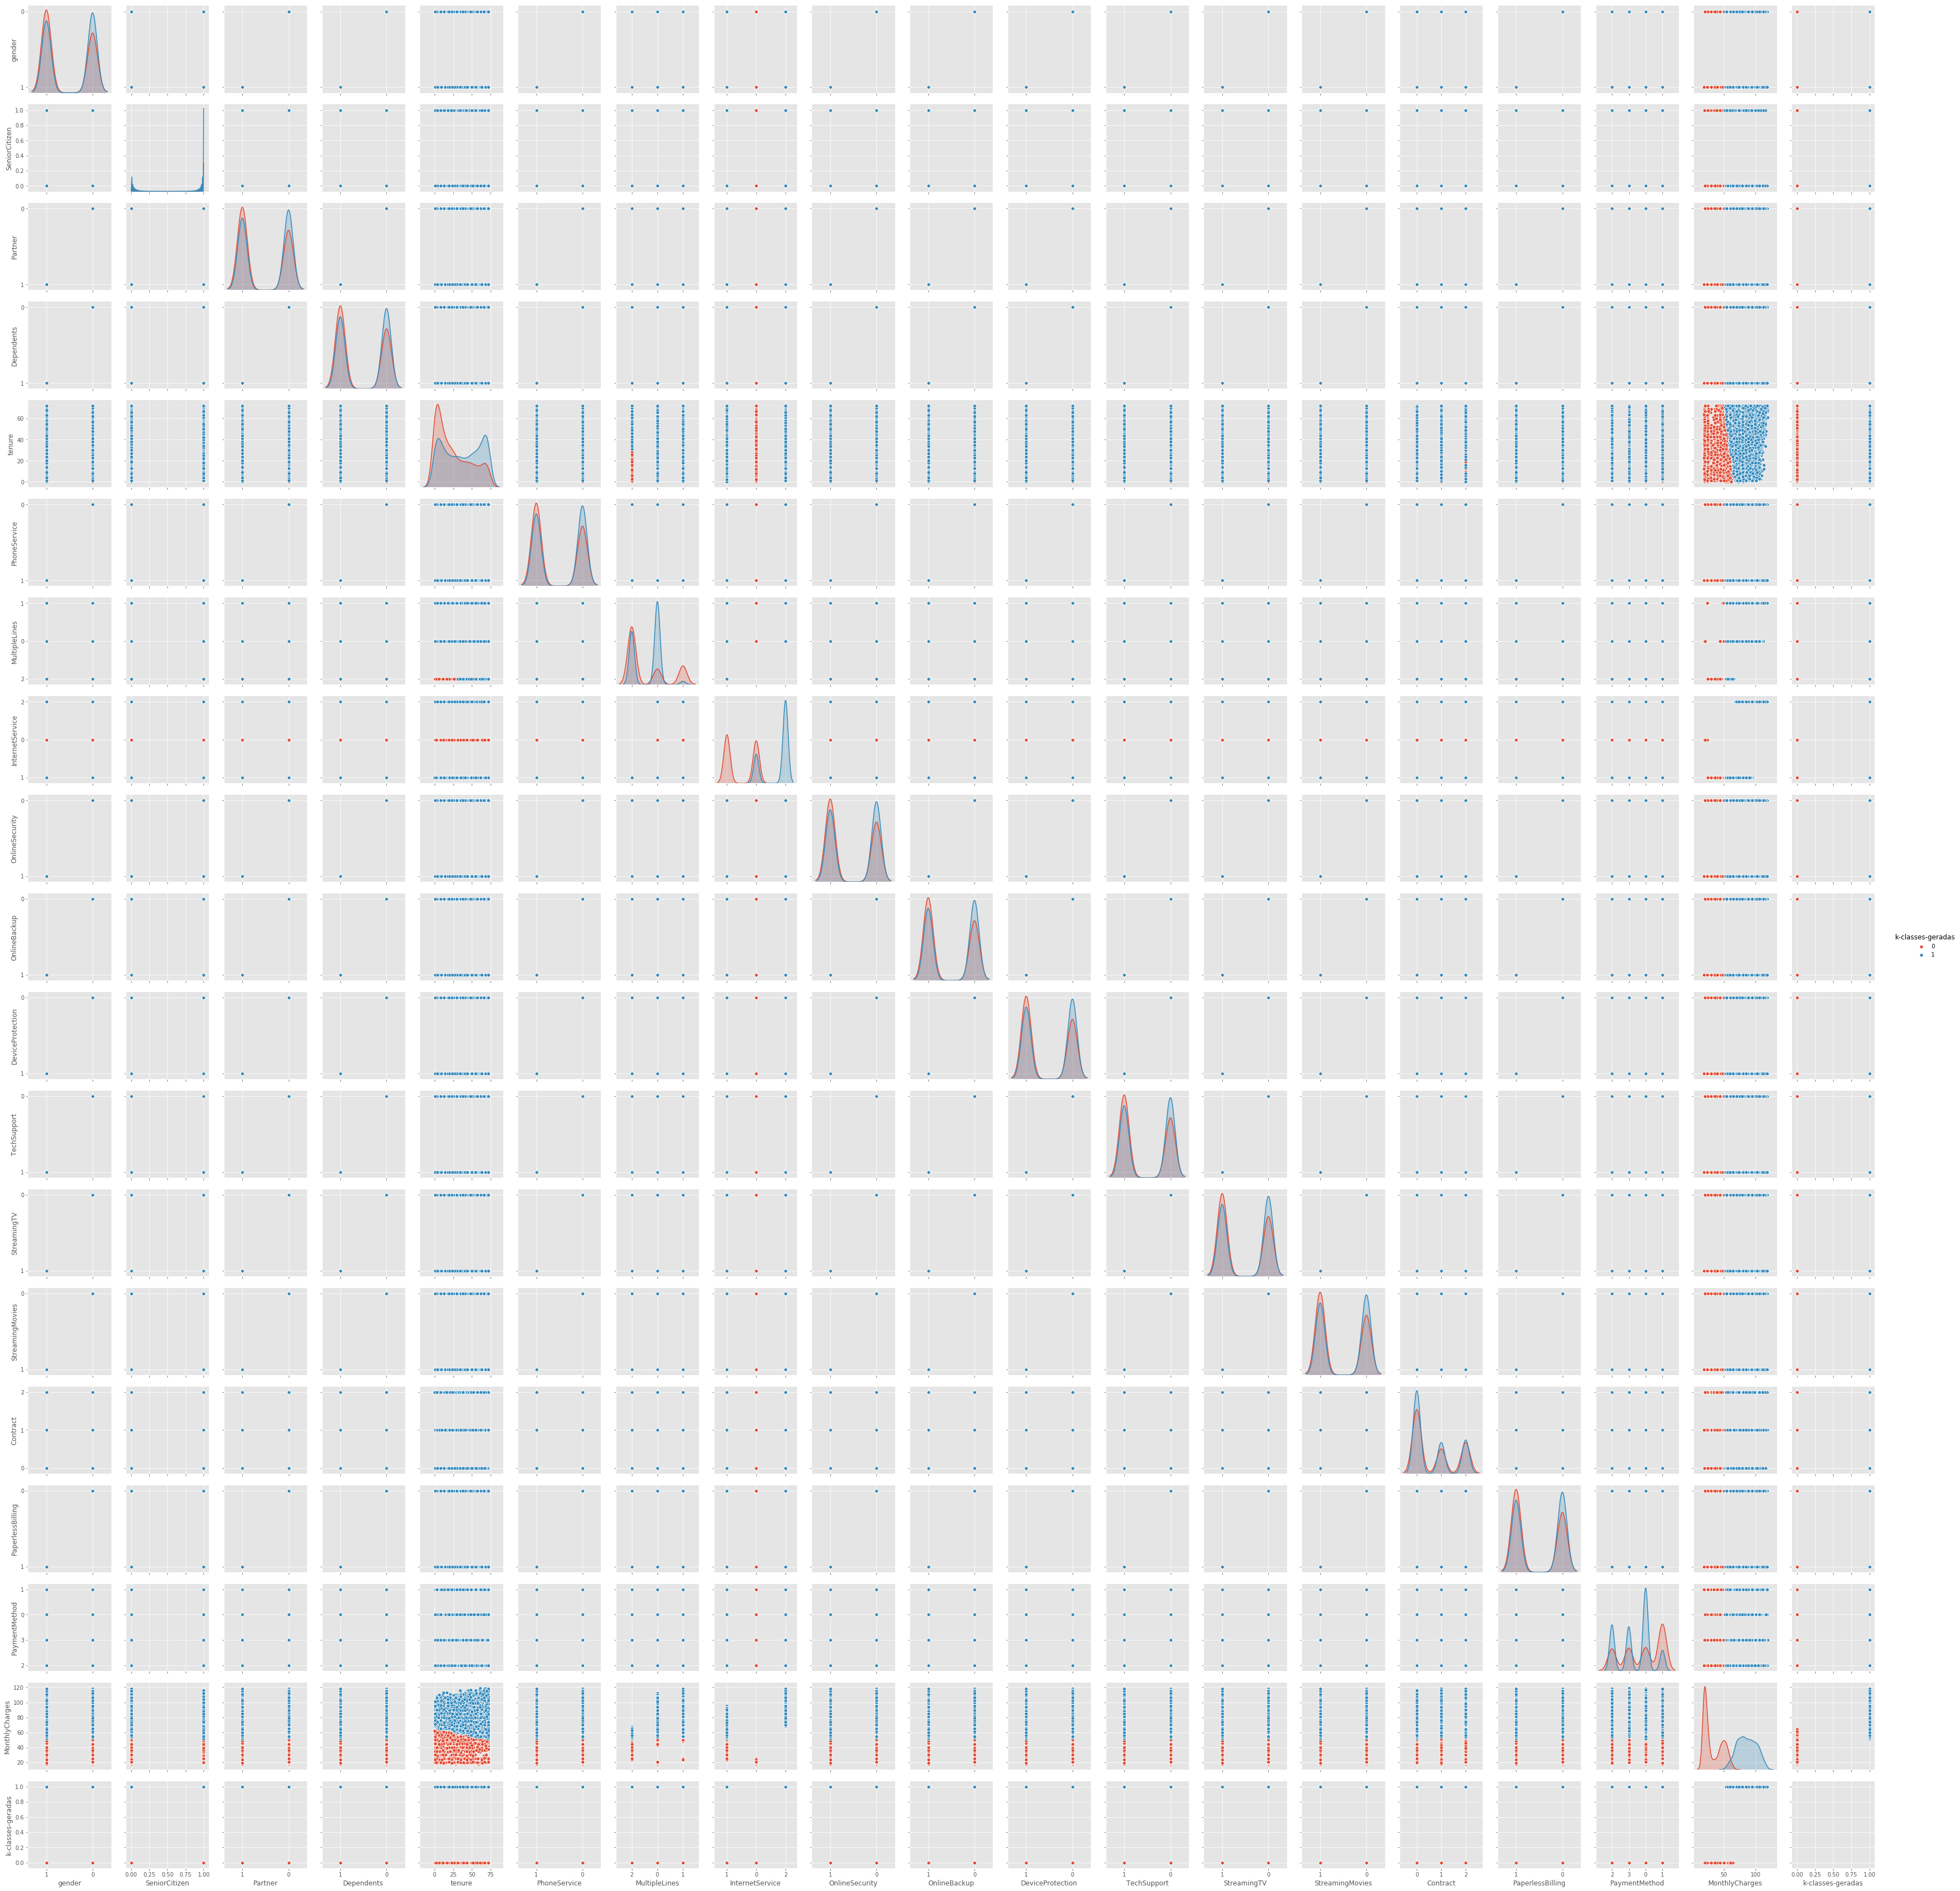

In [96]:
# cuidado ao usar essa função ela exigir um que ter um grande processamento do pc
sns.pairplot(data,hue="k-classes-geradas")

In [98]:
data["k-classes-geradas"].value_counts()

1    4177
0    2866
Name: k-classes-geradas, dtype: int64

In [99]:
y_original["Churn"].value_counts()

0    3641
1    3402
Name: Churn, dtype: int64

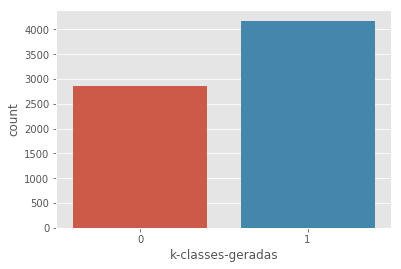

In [100]:
sns.countplot(data["k-classes-geradas"])

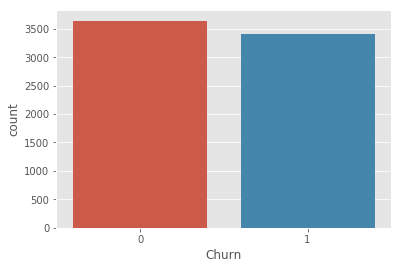

In [101]:
sns.countplot(y_original["Churn"])

In [102]:
data1 = {}
data1["k-classes-geradas"] = data["k-classes-geradas"]
data.drop('k-classes-geradas', inplace=True, axis=1)

In [106]:
train_X, test_X, train_y, test_y = train_test_split(data,data1["k-classes-geradas"] , test_size=0.20)

In [108]:
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

In [110]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(train_X,train_y)
pred_rfc = rfc.predict(test_X)

In [112]:
print(classification_report(test_y,pred_rfc))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       565
          1       0.99      0.99      0.99       844

avg / total       0.99      0.99      0.99      1409



C:\Users\alfred\Anaconda2\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


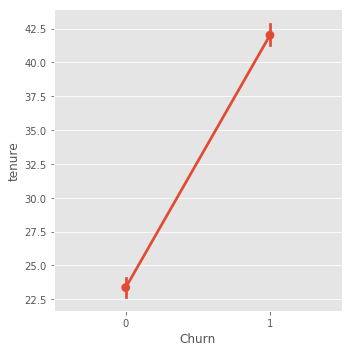

In [115]:
data["k-classes-geradas"] = data1["k-classes-geradas"]
data["Churn"] = y_original["Churn"]
sns.factorplot('Churn','tenure', data=data)